In [1]:
# Imports
import cv2
from matplotlib import pyplot as plt
from scipy import ndimage
import numpy as np
from PIL import Image
from tqdm import tqdm_notebook
import operator
import warnings
warnings.filterwarnings('ignore')
##################
from google.colab import drive
drive.mount('/gdrive')
import os
project_dir=('/gdrive/My Drive/Colab Notebooks/Kannada_MNIST')
os.chdir(project_dir)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# Firstly, load the model trained on the main dataset.

In [2]:
from keras.models import load_model
model = load_model('./models/ka_mnist_cnn_worst_case.h5')

Using TensorFlow backend.
W0720 22:14:57.726678 140584276375424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 22:14:57.746336 140584276375424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 22:14:57.775901 140584276375424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0720 22:14:57.778576 140584276375424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 22:14:57.780086 140584

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from __future__ import unicode_literals
# from fontTools.ttLib import TTFont
import matplotlib.font_manager as mfm

def plot_confusion_matrix_KaMNIST(y_true, y_pred, 
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,file_name='test.png'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # Customized this one!
    classes = ['೦', '೧', '೨', '೩', '೪', '೫', '೬', '೭', '೮', '೯']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    font_path = './fonts/Kannada/Hubballi-Regular.ttf'
    prop = mfm.FontProperties(fname=font_path) # find this font
    ax.set_xticklabels(labels=classes,fontproperties=prop,fontsize=20)
    ax.set_yticklabels(labels=classes,fontproperties=prop,fontsize=20)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.savefig(file_name,dpi=300)
    
    return ax
###############################################
# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py



# Does it generalize to my own handwritten digits?

Confusion matrix, without normalization
[[ 78  16   3   0   0   0  14   2   3  12]
 [  1 122   3   0   0   2   0   0   0   0]
 [  0   0 128   0   0   0   0   0   0   0]
 [  0   0   9 101   0  17   1   0   0   0]
 [  0   0   0   0 111   3   0   0  14   0]
 [  0   1   0   0   0 126   0   0   1   0]
 [  0   0   8   0   1   1 114   2   0   2]
 [  0   0  10   1   0   2  34  81   0   0]
 [  0   0   8   0   1   0  26   0  91   2]
 [  0   0   1   0   0   0   0   0   8 119]]


0.83671875

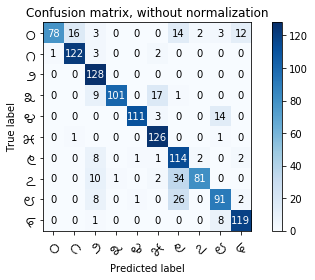

In [4]:
X_mini=np.load('./data/input_tensors/X_KaMNIST_ICLR.npy')
y_mini=np.load('./data/input_tensors/y_KaMNIST_ICLR.npy')


np.set_printoptions(precision=2)
y_pred_mini=model.predict_classes((X_mini.astype('float32')/255))

# Plot non-normalized confusion matrix
plot_confusion_matrix_KaMNIST(y_mini.astype(int), y_pred_mini, 
                      title='Confusion matrix, without normalization',file_name='./figures/iclr_cmat_unnorm_mini.png')

(y_mini.astype(int)==y_pred_mini).mean()

In [5]:
from sklearn.metrics import classification_report
print("Classification report for classifier %s:\n%s\n"
      % ('CNN', classification_report(y_mini.astype(int), y_pred_mini)))
print("Confusion matrix:\n%s" % confusion_matrix(y_mini.astype(int), y_pred_mini))
# classification_report(y_mini.astype(int), y_pred_mini,labels=np.unique(y_mini.astype(int)), output_dict=True)

Classification report for classifier CNN:
              precision    recall  f1-score   support

           0       0.99      0.61      0.75       128
           1       0.88      0.95      0.91       128
           2       0.75      1.00      0.86       128
           3       0.99      0.79      0.88       128
           4       0.98      0.87      0.92       128
           5       0.83      0.98      0.90       128
           6       0.60      0.89      0.72       128
           7       0.95      0.63      0.76       128
           8       0.78      0.71      0.74       128
           9       0.88      0.93      0.90       128

    accuracy                           0.84      1280
   macro avg       0.86      0.84      0.84      1280
weighted avg       0.86      0.84      0.84      1280


Confusion matrix:
[[ 78  16   3   0   0   0  14   2   3  12]
 [  1 122   3   0   0   2   0   0   0   0]
 [  0   0 128   0   0   0   0   0   0   0]
 [  0   0   9 101   0  17   1   0   0   0]
 [  0   

In [0]:
incorrect_ind=np.where(y_pred_mini[y_mini==0]!=0)[0]


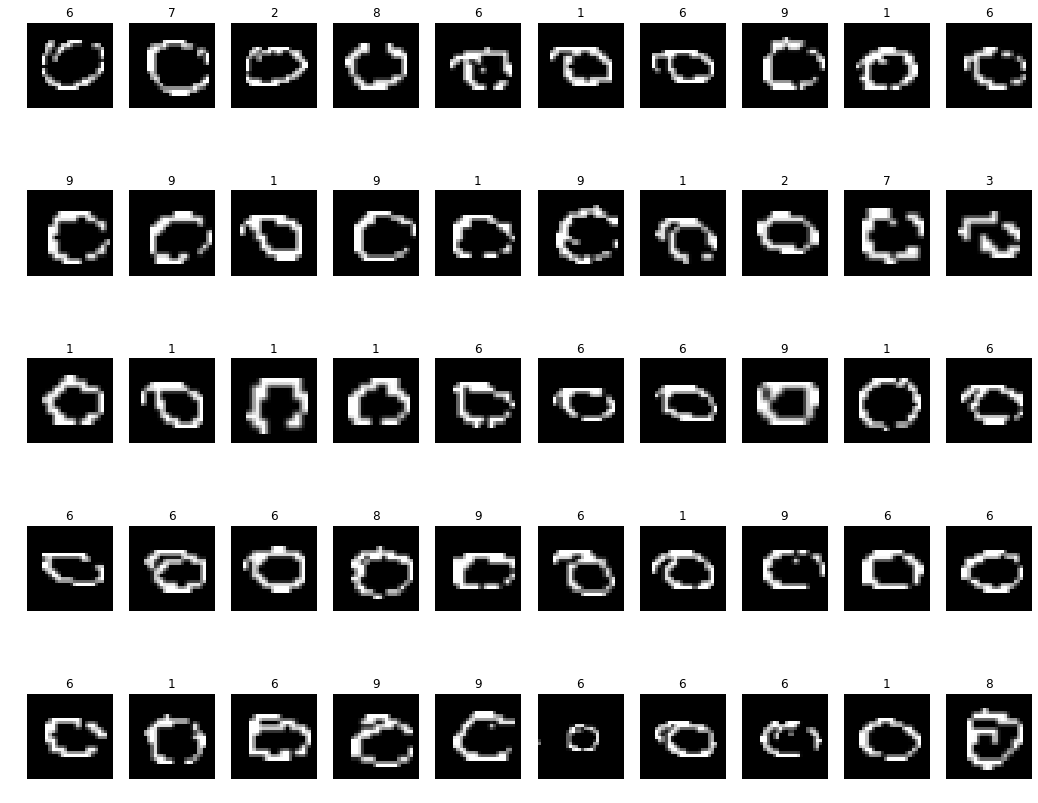

In [7]:
X_mini_0=X_mini[y_mini==0]
incorrect_images=X_mini_0[incorrect_ind,:,:,:]
pred_wrong=model.predict_classes(incorrect_images)
plt.figure(figsize=(18,18))
for i in range(incorrect_images.shape[0]):
  plt.subplot(6,10,i+1)
  plt.imshow(incorrect_images[i,:,:,0],cmap='gray')
  plt.axis('off')
  plt.title(pred_wrong[i])
# plt.tight_layout()
plt.savefig('./figures/iclr_misclassified_0.png',dpi=300)


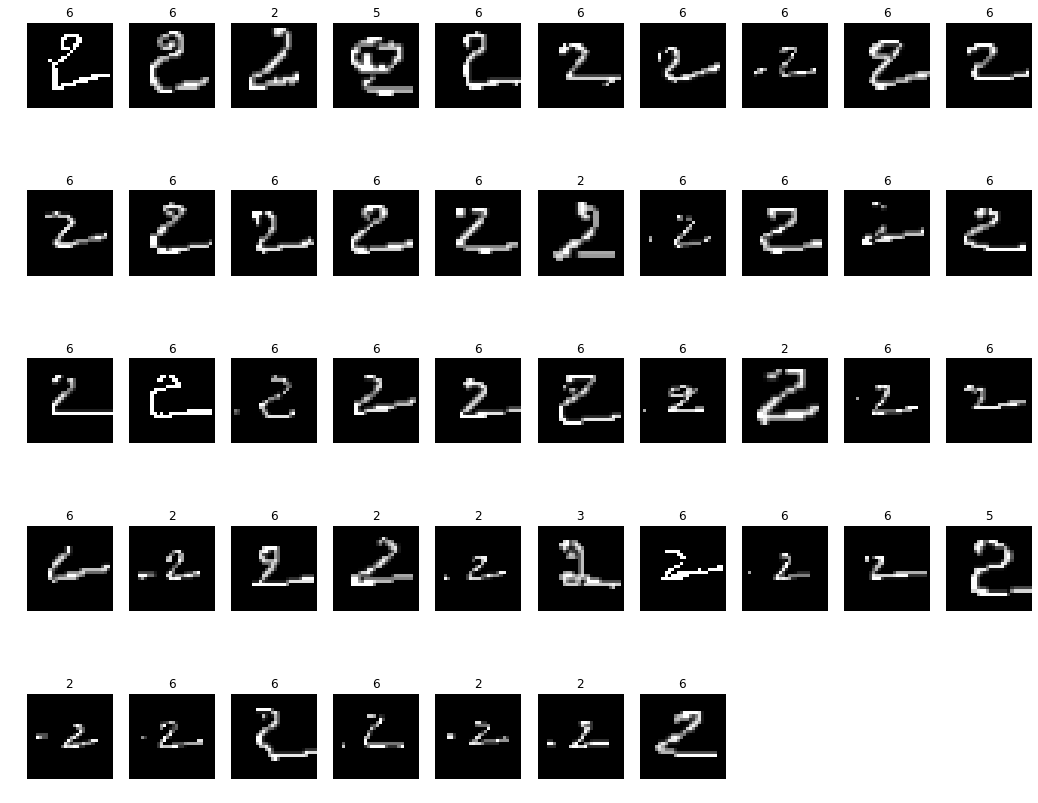

In [8]:
incorrect_ind=np.where(y_pred_mini[y_mini==7]!=7)[0]
X_mini_7=X_mini[y_mini==7]
incorrect_images=X_mini_7[incorrect_ind,:,:,:]
pred_wrong=model.predict_classes(incorrect_images)
plt.figure(figsize=(18,18))
for i in range(incorrect_images.shape[0]):
  plt.subplot(6,10,i+1)
  plt.imshow(incorrect_images[i,:,:,0],cmap='gray')
  plt.axis('off')
  plt.title(pred_wrong[i])
# plt.tight_layout()
plt.savefig('./figures/iclr_misclassified_7.png',dpi=300)

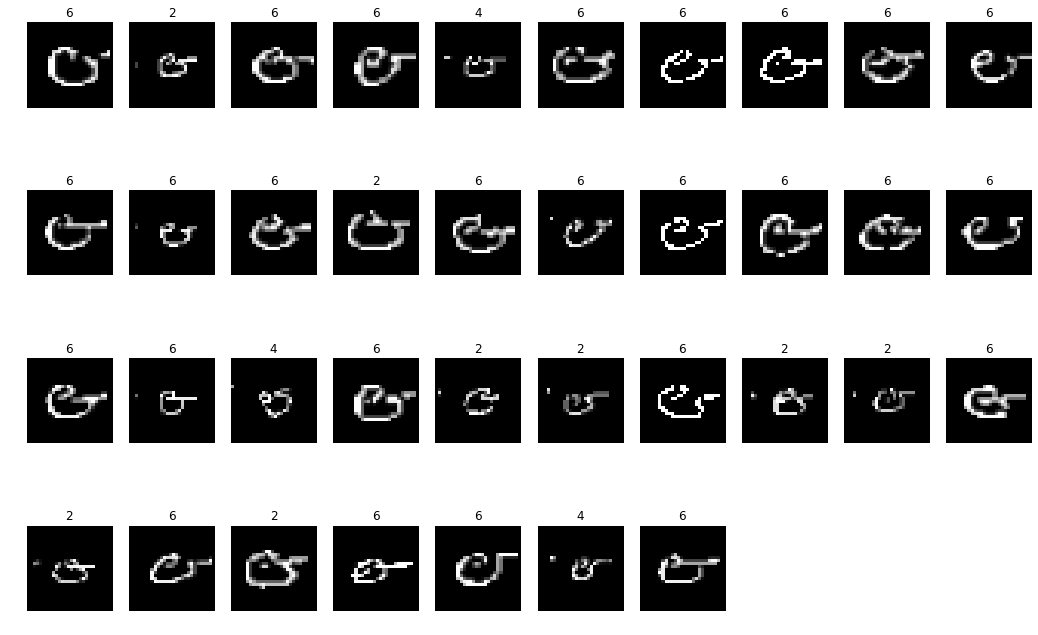

In [9]:
incorrect_ind=np.where(y_pred_mini[y_mini==8]!=8)[0]
X_mini_8=X_mini[y_mini==8]
incorrect_images=X_mini_8[incorrect_ind,:,:,:]
pred_wrong=model.predict_classes(incorrect_images)
plt.figure(figsize=(18,18))
for i in range(incorrect_images.shape[0]):
  plt.subplot(6,10,i+1)
  plt.imshow(incorrect_images[i,:,:,0],cmap='gray')
  plt.axis('off')
  plt.title(pred_wrong[i])
# plt.tight_layout()
plt.savefig('./figures/iclr_misclassified_8.png',dpi=300)